Libraries Integration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import tensorflow.keras.layers as layers
import sklearn.metrics as accuracy



Loading training data


In [2]:
labels_file = pd.read_csv("ArSL_Data_Labels.csv")
labels_file.head()

,#,File_Name,Class
0,1,AIN (1).JPG,ain
1,2,AIN (10).JPG,ain
2,3,AIN (100).jpg,ain
3,4,AIN (1000).JPG,ain
4,5,AIN (1001).JPG,ain


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(labels_file['Class'])   # ['ain','ba',...] → [0,1,...]

df = tf.keras.utils.image_dataset_from_directory(
    "ArASL_Database_54K_Final",
    labels=labels.tolist(),       # must be a list of ints
    label_mode='int',             # integers, not one-hot
    color_mode="grayscale",
    image_size=(64, 64),
    batch_size=32
)

num_classes = len(encoder.classes_)

Found 54049 files belonging to 32 classes.


In [14]:
size = df.cardinality().numpy()
train_size = int(0.8*size)
test_size = size - train_size
train_set = df.take(train_size)
test_set = df.skip(train_size)

In [15]:
normalization = layers.Rescaling(1./255,input_shape = (64,64,1))

train_set = train_set.map(lambda x, y: (normalization(x), y))
test_set = test_set.map(lambda x, y: (normalization(x), y))


c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model1 = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(units = 128,activation = 'relu'),
    layers.Dense(units = 64,activation = 'relu'),
    layers.Dense(units = num_classes,activation = 'softmax')
])
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [24]:
model.fit(train_set,epochs = 10)


Epoch 1/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 63s 46ms/step - accuracy: 0.4966 - loss: 1.6532
Epoch 2/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 61s 45ms/step - accuracy: 0.7984 - loss: 0.6193
Epoch 3/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 63s 47ms/step - accuracy: 0.8605 - loss: 0.4314
Epoch 4/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 62s 46ms/step - accuracy: 0.8907 - loss: 0.3355
Epoch 5/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 64s 47ms/step - accuracy: 0.9097 - loss: 0.2782
Epoch 6/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - accuracy: 0.9207 - loss: 0.2428
Epoch 7/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 62s 46ms/step - accuracy: 0.9288 - loss: 0.2139
Epoch 8/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 62s 46ms/step - accuracy: 0.9350 - loss: 0.1924
Epoch 9/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 63s 46ms/step - accuracy: 0.9401 - loss: 0.1793
Epoch 10/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 69s 51ms/step - accuracy: 0.9445 - loss: 0.1649


In [25]:
import tensorflow as tf
import numpy as np

img = tf.keras.utils.load_img(
    "ArASL_Database_54K_Final/ArASL_Database_54K_Final/bb/BB (1).JPG",
    target_size=(64, 64),    # same size as training
    color_mode="grayscale"   # since you trained on grayscale
)

# Convert to array and scale
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

pred = model.predict(img_array)       # softmax outputs
pred_class = np.argmax(pred, axis=1)  # best class index

print("Predicted class:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted class: [3]


In [ ]:
images, labels = next(iter(df))
print(images.shape)
print(labels[:5].numpy())

(32, 64, 64, 1)
[b'haa' b'meem' b'ra' b'jeem' b'dha']


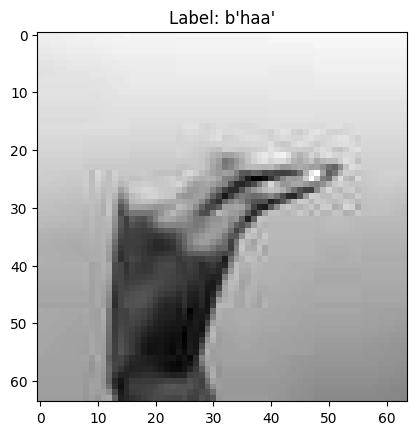

In [ ]:

plt.imshow(images[0].numpy().squeeze(), cmap="gray")
plt.title(f"Label: {labels[0].numpy()}")
plt.show()


Implementing the model


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [ ]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(64, 64, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
                metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534,752 (2.04 MB)

 Trainable params: 534,752 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(df, epochs=10)

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\tornado\platform\asyncio.py", line 211, in start

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\asyncio\base_events.py", line 683, in run_forever

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\asyncio\base_events.py", line 2042, in _run_once

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\asyncio\events.py", line 89, in _run

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\interactiveshell.py", line 3116, in run_cell

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\interactiveshell.py", line 3171, in _run_cell

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\interactiveshell.py", line 3394, in run_cell_async

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\interactiveshell.py", line 3639, in run_ast_nodes

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code

  File "C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_12732\852404544.py", line 1, in <module>

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 377, in fit

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 220, in function

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 133, in multi_step_on_iterator

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 114, in one_step_on_data

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 61, in train_step

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\compile_utils.py", line 690, in __call__

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\compile_utils.py", line 699, in call

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\losses\loss.py", line 63, in __call__

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\tree\tree_api.py", line 192, in map_structure

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\tree\optree_impl.py", line 111, in map_structure

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\optree\ops.py", line 766, in tree_map

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\losses\loss.py", line 64, in <lambda>

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\ops\core.py", line 998, in convert_to_tensor

  File "c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 160, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/sparse_categorical_crossentropy/Cast}}]] [Op:__inference_multi_step_on_iterator_4477]